#1.1. Data Exploration
- Displaying first 5 rows
- Displaying some statistics
- Checking for missing values and duplicates

In [ ]:
#Import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from scipy import stats

#Load Dataset
data = pd.read_csv('Mall_Customers.csv')

#Display first few rows to understand the data
print(data.head())

#1.Exploring the dataset

#Displaying some statistics
print("Statistics:")
print(data.describe())

#Check for missing vales
print("\nMissing Values:")
print(data.isnull().sum())

#Check for duplicate values
print("\nDuplicate Values:")
print(data.duplicated().sum())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.0

# 1.2. Data Preprocessing
- Dropping the CustomerID Column (not required for modeling)
- Encode the 'Gender' column into 1s and Os
- Data normalization using StandardScaler()

In [ ]:
#CustomerID Column will be dropped (Not required for modeling)
data_cleaned = data.drop(['CustomerID'], axis=1)
data_cleaned.head()

#Encoding the Gender column
data_cleaned['Gender'] = data_cleaned['Gender'].map({'Male': 0, 'Female': 1})
data_cleaned.head()

#Performing normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)
data_scaled = pd.DataFrame(data_scaled, columns=data_cleaned.columns)
data_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


# 1.3. Data Visualization
- Using Pair Plot to show relationships
- Using Histograms to view distributions

Pair Plot:


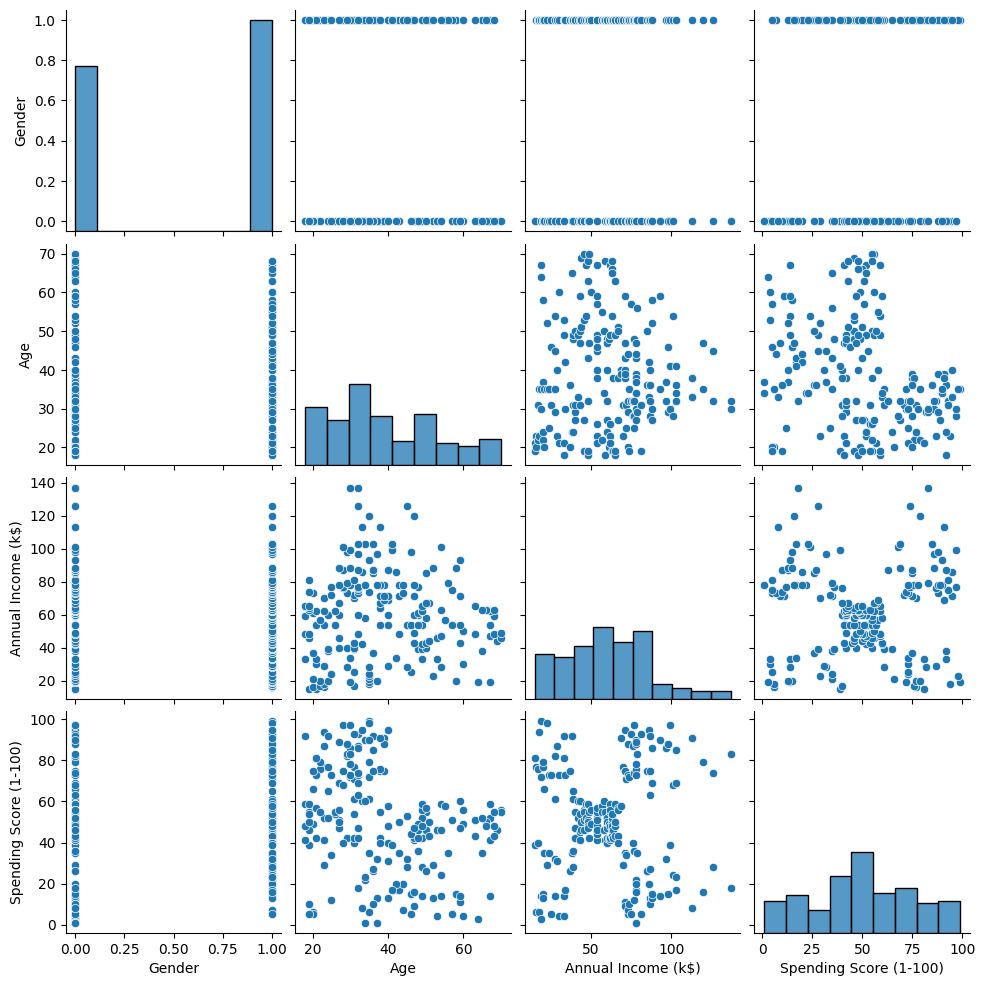


Histograms:


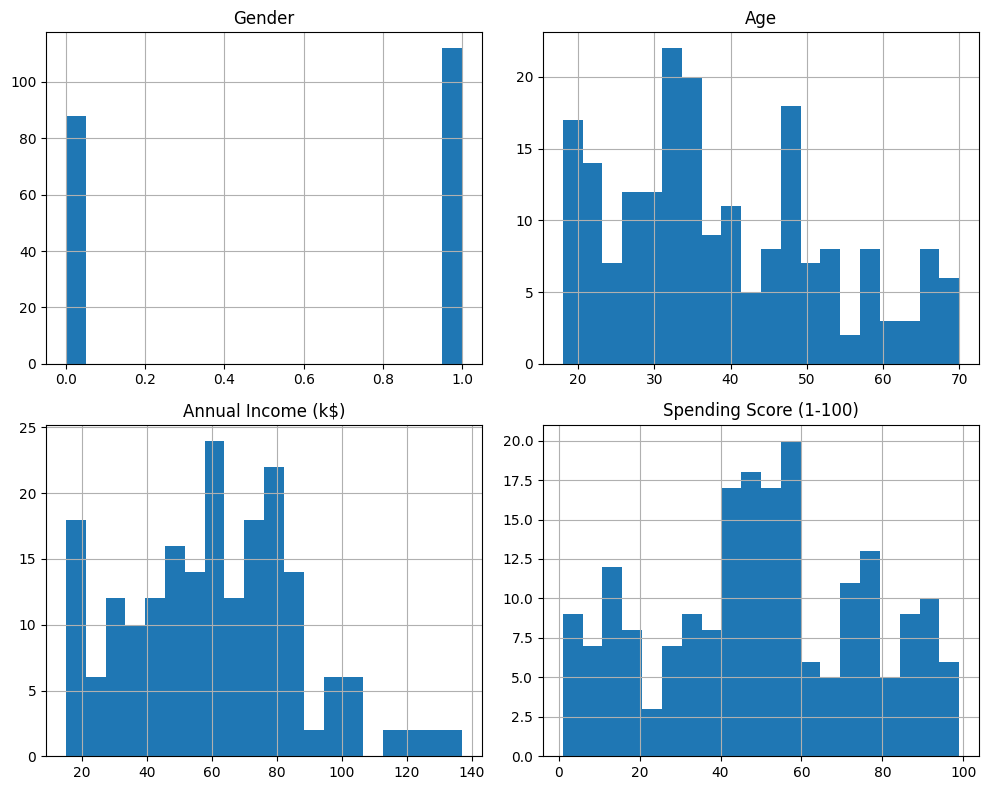

In [ ]:
#Using pair plot
print("Pair Plot:")
sns.pairplot(data_cleaned)
plt.show()

#Using Histograms
print("\nHistograms:")
data_cleaned.hist(bins = 20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# 2.1. K-Means Clustering using Elbow Method
- To find optimal number of clusters

<function matplotlib.pyplot.show(close=None, block=None)>

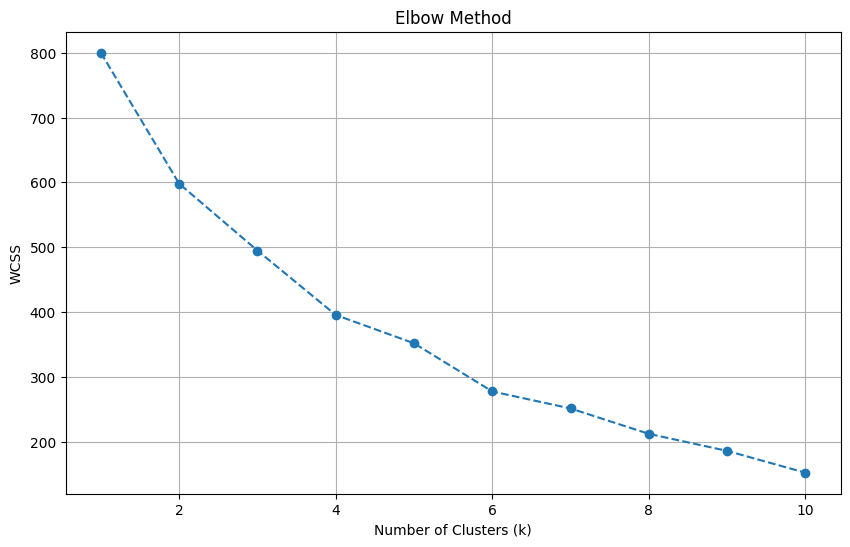

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

#Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show

# 2.2. Visualizing clusters in 2D using PCA
- Used for dimensionality reduction

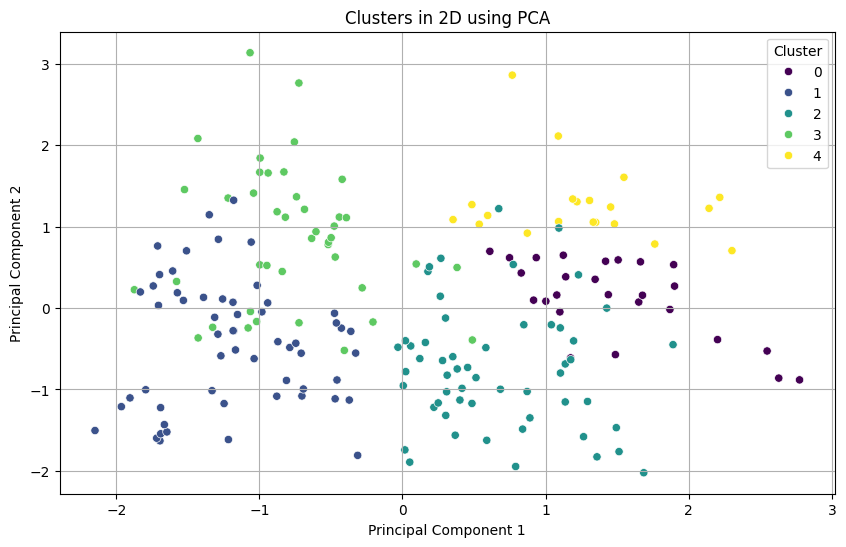

In [ ]:
#Assume k=5 based on the elbow plot
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_scaled)

#Adding cluster labels for visualization
data_scaled['Cluster'] = clusters

#Reduce dataset to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled.drop('Cluster', axis=1))

#Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_reduced[:, 0], y=data_reduced[:, 1], hue=data_scaled['Cluster'], palette='viridis')
plt.title('Clusters in 2D using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 3.1. Hierarchical Clustering
- Using Agglomerative clustering with different linkage methods

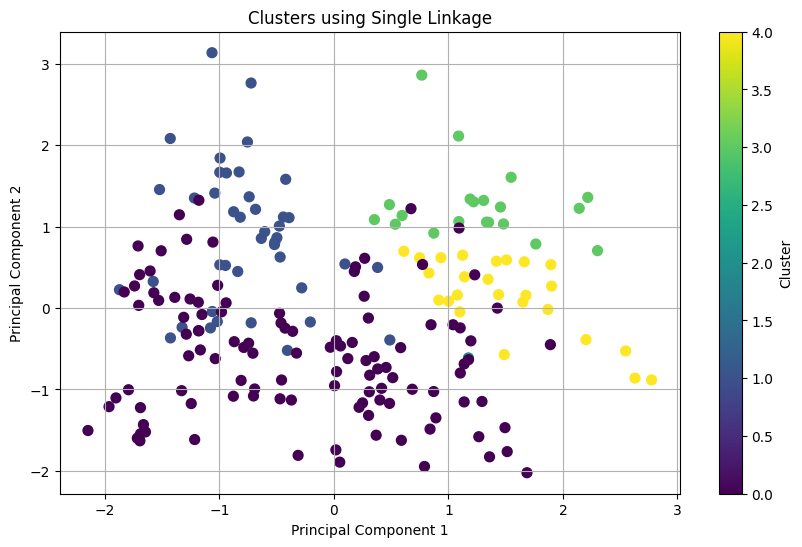

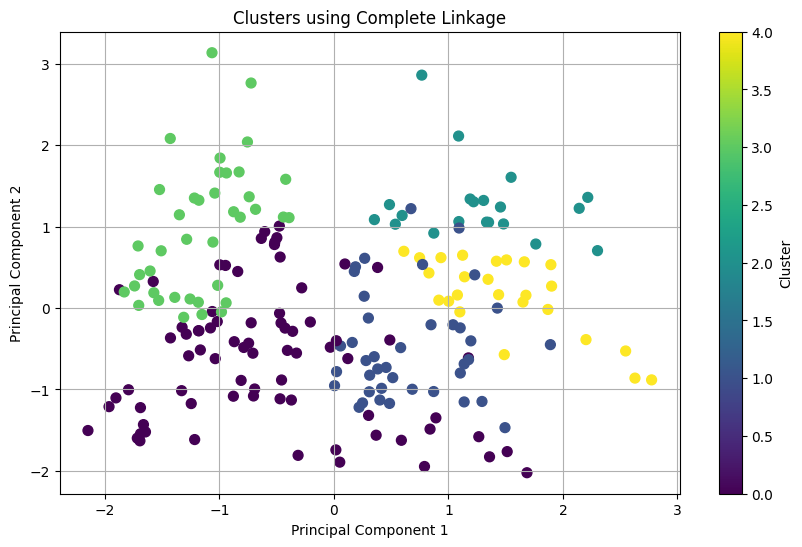

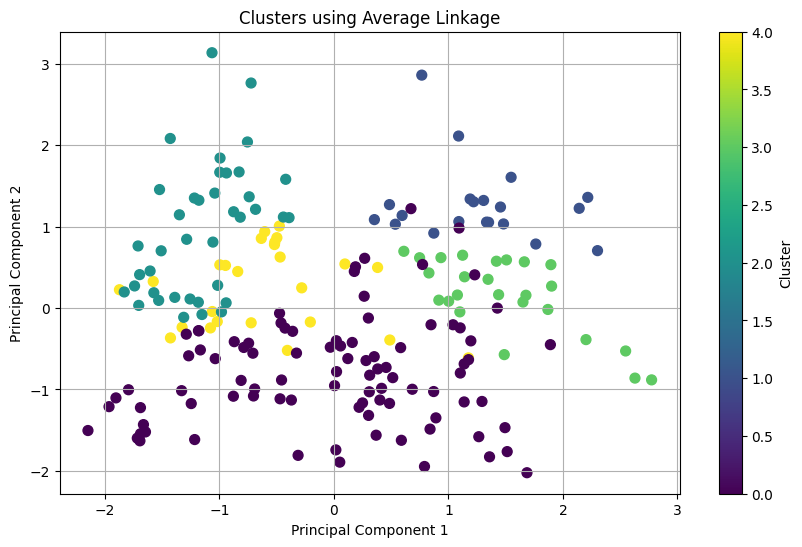

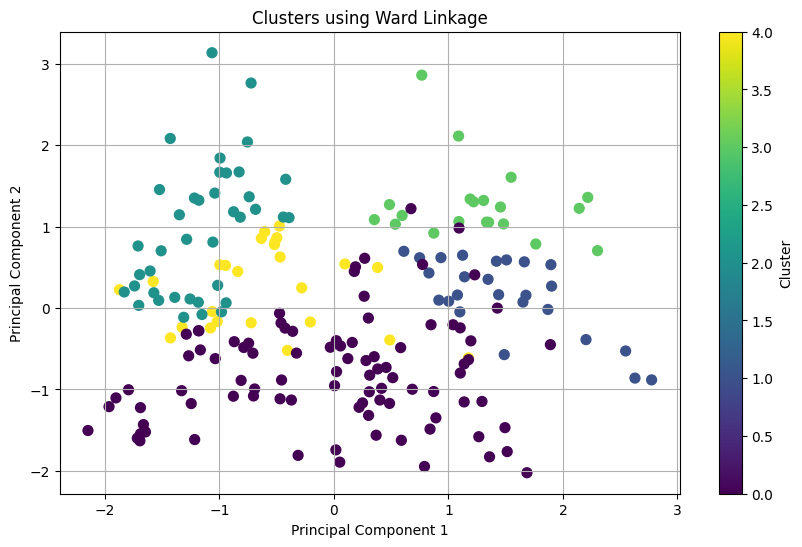

In [ ]:
#import libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt

#Performing agglomerative clustering and visualize clusters
def agglomerative_clustering(linkage_method):
    agg_clustering = AgglomerativeClustering(n_clusters=5, linkage=linkage_method)
    clusters = agg_clustering.fit_predict(data_scaled)
    data_scaled['Cluster'] = clusters

    #Reduce dimensions
    pca = PCA(n_components=2)
    data_reduced = pca.fit_transform(data_scaled.drop('Cluster', axis=1))

    #Plot the clusters in 2D
    plt.figure(figsize=(10, 6))
    plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=data_scaled['Cluster'], cmap='viridis', s = 50)
    plt.title(f'Clusters using {linkage_method.capitalize()} Linkage')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show

#Different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

for method in linkage_methods:
    agglomerative_clustering(method)

# 3.2. Using Dendogram to visualize hierarchical clustering

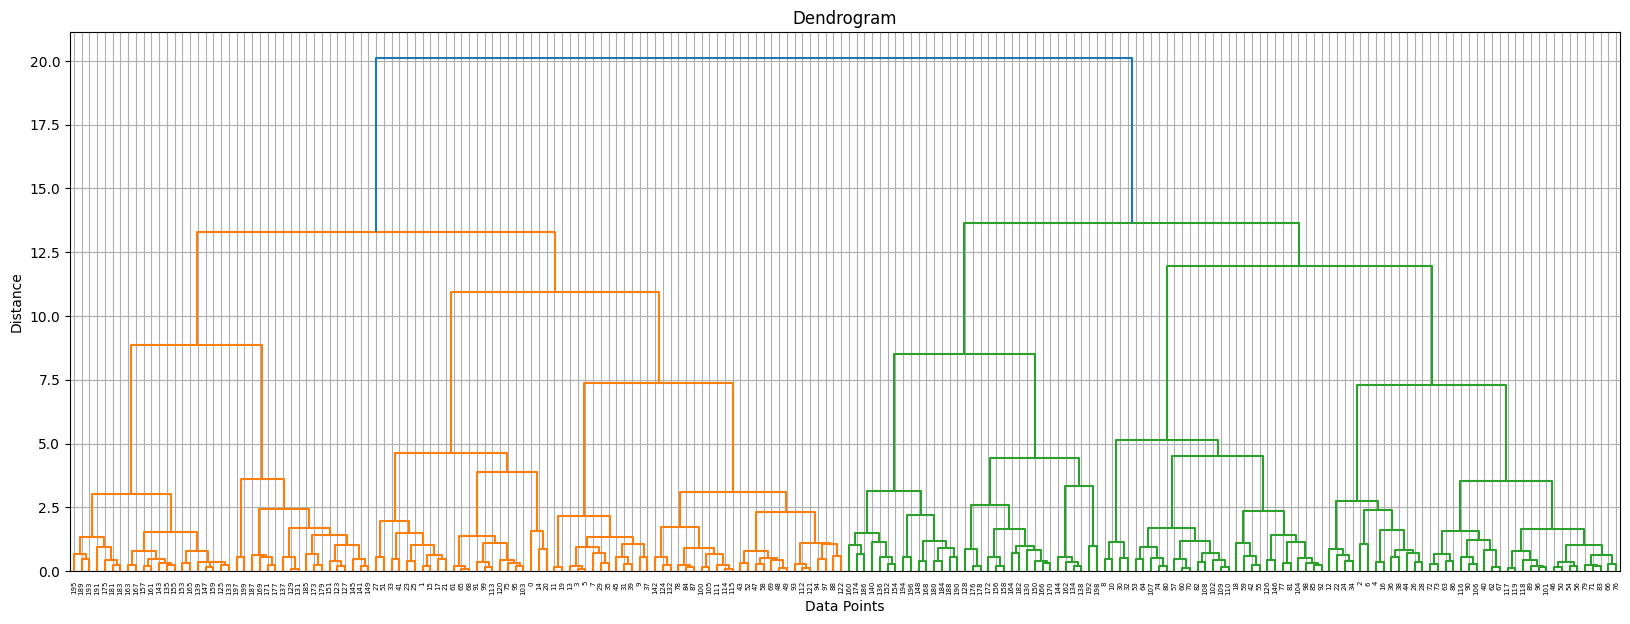

In [ ]:
#Creating a linkage matrix using the 'ward' method
linkage_matrix = linkage(data_scaled.drop('Cluster', axis=1), method='ward')

#Plot the dendrogram
plt.figure(figsize=(20, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# 4.1. Perform PCA to reduce dataset dimensionality

Explained Variance Ratio: [0.33690046 0.26230645]


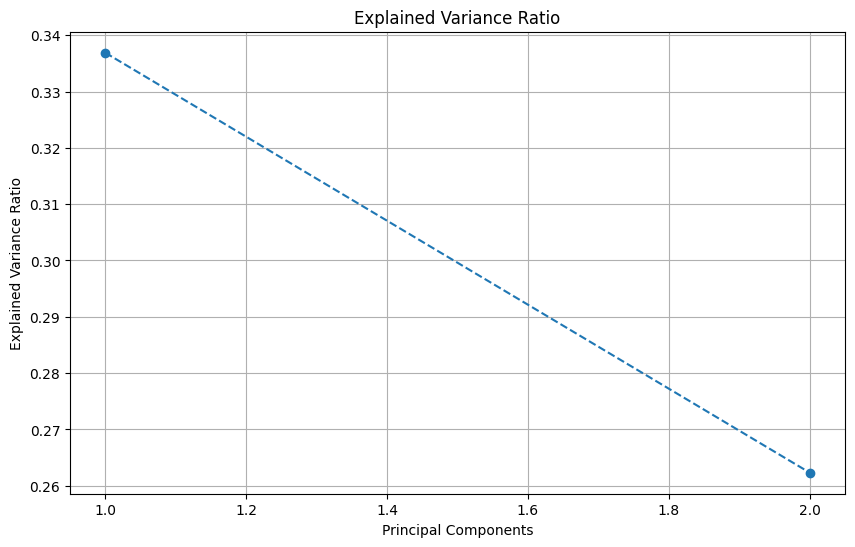

In [ ]:
#Initialize PCA and fit on scaled data
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled.drop('Cluster', axis=1))

#Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

#Plot explained variance ratio for each principal component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# 4.2. Visualizing using 2D Scatter Plot

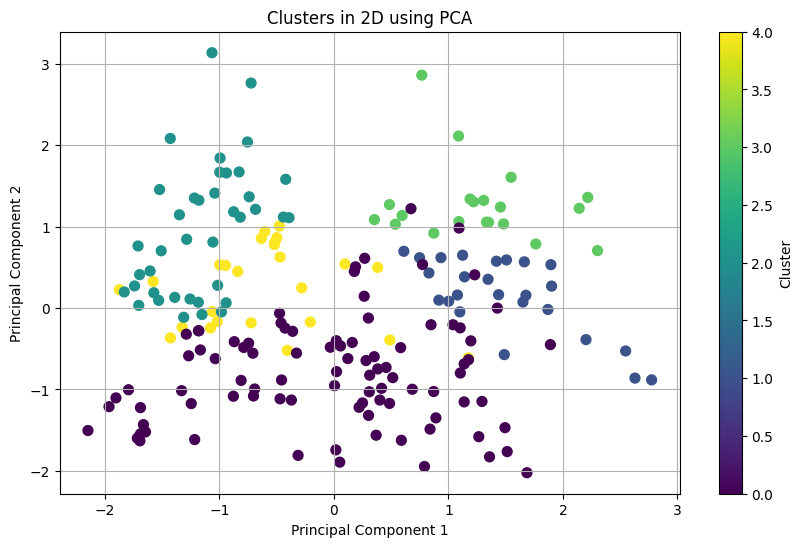

In [ ]:
#Reduce to 2 principal components for 2D plotting
pca_2D = PCA(n_components=2)
pca_data_2D = pca_2D.fit_transform(data_scaled.drop('Cluster', axis=1))

#Assign Cluster colum from previous clustering
clusters = data_scaled['Cluster'] if 'Cluster' in data_scaled.columns else kmeans.labels_

#Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_data_2D[:, 0], pca_data_2D[:, 1], c=clusters, cmap='viridis', s = 50)
plt.title('Clusters in 2D using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# 5. Apply t-SNE to reduce dataset dimensionality

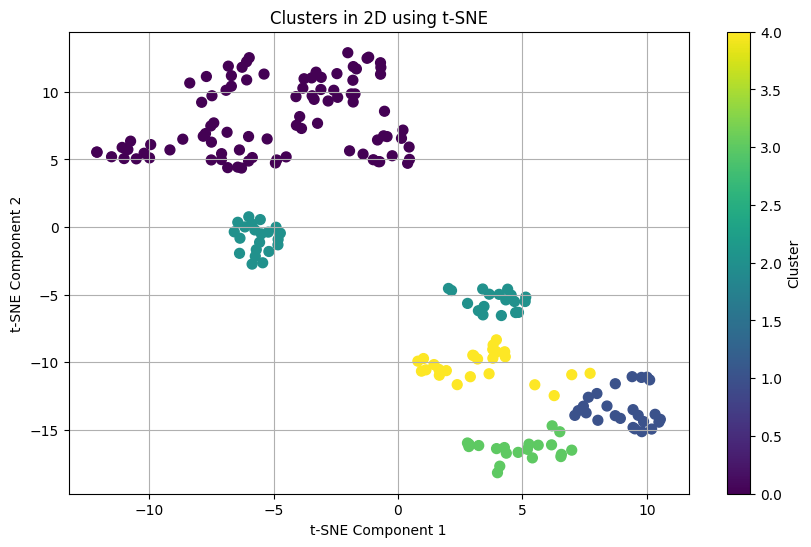

In [ ]:
#Import libraries

from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
#Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(data_scaled.drop('Cluster', axis=1))

#Plot the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=clusters, cmap='viridis', s = 50)
plt.title('Clusters in 2D using t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

# 6. Silhouette Score

In [ ]:
#Import library
from sklearn.metrics import silhouette_score

#Calculate Silhouette Score
silhouette_avg = silhouette_score(data_scaled.drop('Cluster', axis=1), clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.2864233095663132


# Analysis Questions
1. What trends or relationships do you observe in the data?
- There is a wide range of ages from 20 - 60 years old.
- Customers with high spending score have a high annual income.
- Young customers have a high spending score compared to older customers.

2. What is the optimal number of clusters according to the elbow method?
5 clusters

3. Interpret the characteristics of each cluster.
- Customers that are relatively young earn a moderate income and have a high spending score
- Customers that are older have higher incomes and are low spenders
- Middle aged customers with lower incomes have moderate spending scores
- Young customers with high incomes have high spending scores

4. How do the clusters formed using hierarchical clustering differ from K-Means?
K-Means tend to be more spherical clusters whereas Hierarchical has various shapes and sizes

5. Which linkage method produces the best results?
They are all equally good depending on the characteristics of the dataset and the expected shape.

6. How much variance is explained by the first two principal components?
Explained Variance Ratio: [0.33690046 0.26230645]

7. How does PCA help in visualizing the clusters?
It reduces the dimensionality while retaining much variance as possible

8. How does t-SNE differ from PCA in terms of visualization and cluster separation?
PCA shows how data is distributed but can't capture distinct clusters whereas t-SNE shows a clear separation and distinction of the clusters

9. Which dimensionality reduction technique gives a clearer cluster separation?
t-SNE
